In [70]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
import graphviz
import os
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
java_path = "F:/java/bin/java.exe"
os.environ['JAVAHOME'] = java_path
os.environ["PATH"] += os.pathsep + 'F:/graphviz/bin/'

In [4]:
biden = pd.read_csv('biden.csv')

In [7]:
biden.head(10)

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1
5,85,1,27,16,1,0
6,60,1,28,12,0,0
7,50,0,31,15,1,0
8,50,1,32,13,0,0
9,70,0,51,14,1,0


In [29]:
y = biden['biden'].values
X = biden[['female', 'age', 'educ', 'dem', 'rep']].values


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3,
                                                    random_state=25)
biden_tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)
biden_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

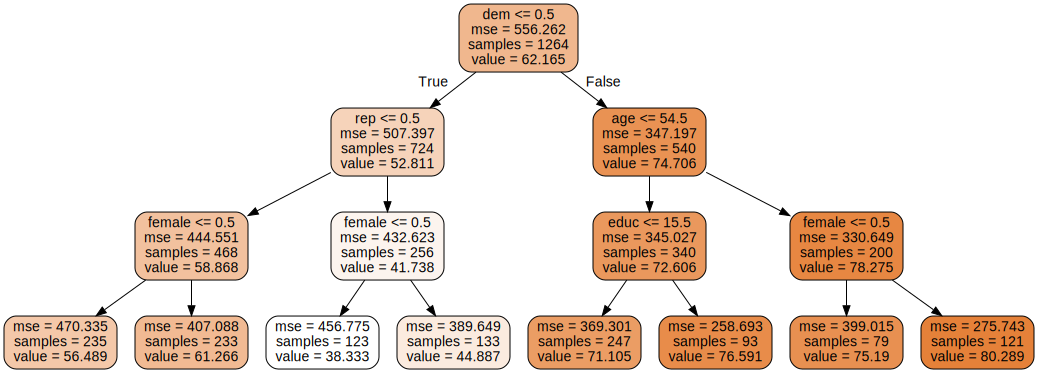

In [59]:
biden_tree_viz = export_graphviz(
    biden_tree,
    out_file=None,
    rounded=True,
    filled=True,
    feature_names=np.array(['female', 'age', 'educ', 'dem', 'rep']),
)

graph = graphviz.Source(biden_tree_viz)
graph.render('biden_tree_viz')
graph

In [60]:
y_pred = biden_tree.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print('MSE=', MSE)

MSE= 396.1937146321307


In [62]:
biden_tree2 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, max_leaf_nodes = biden.shape[0])
biden_tree2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=1807, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

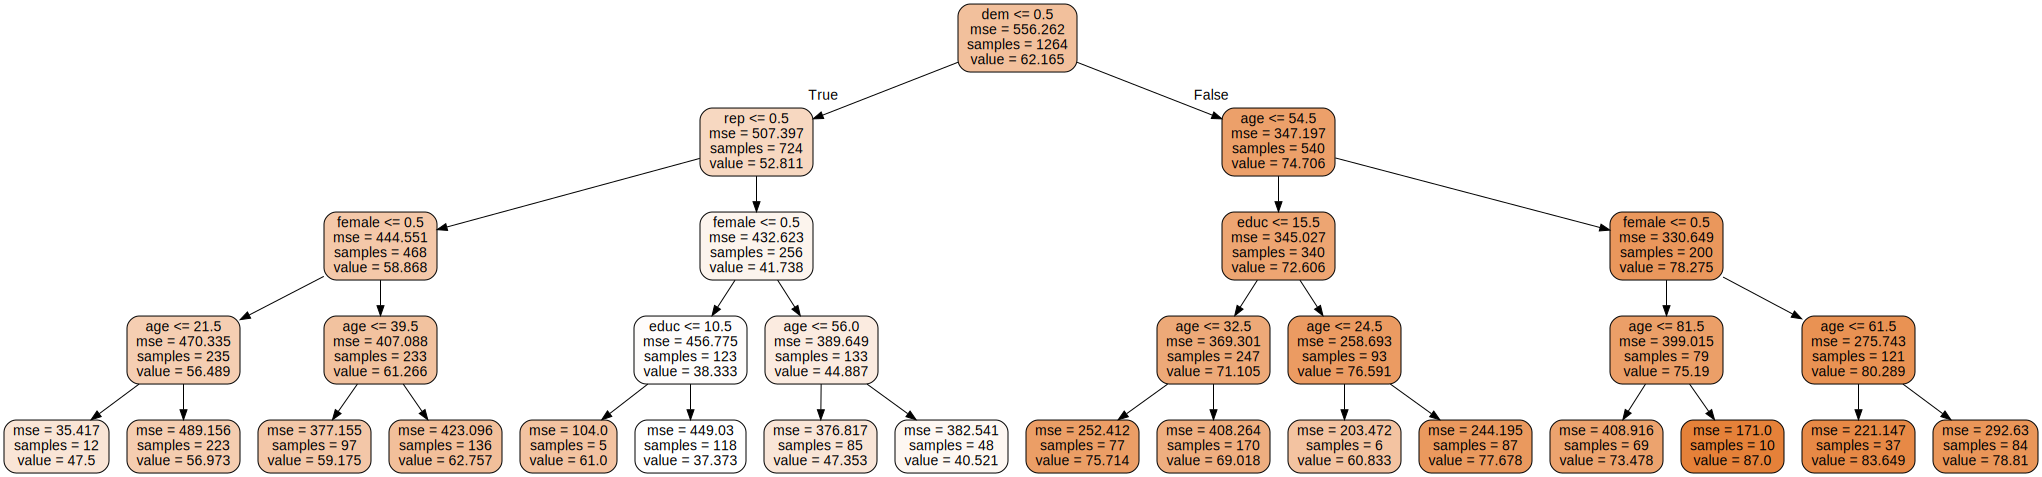

In [63]:
biden_tree2_viz = export_graphviz(
    biden_tree2,
    out_file=None,
    rounded=True,
    filled=True,
    feature_names=np.array(['female', 'age', 'educ', 'dem', 'rep']),
)

graph = graphviz.Source(biden_tree2_viz)
graph.render('biden_tree2_viz')
graph

In [64]:
y_pred = biden_tree2.predict(X_test)
MSE2 = mean_squared_error(y_test, y_pred)
print('MSE=', MSE2)

MSE= 404.59602362340974


In [68]:
biden_tree3 = BaggingRegressor(DecisionTreeRegressor(), n_estimators=100,
                             max_samples=100, bootstrap=True, oob_score=True, random_state=15)
# hit_tree3 = BaggingRegressor(DecisionTreeRegressor(max_depth=3, min_samples_leaf=5), n_estimators=100,
#                              max_samples=100, bootstrap=True, oob_score=True, random_state=15)
biden_tree3.fit(X, y)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=100, n_jobs=1, oob_score=True,
         random_state=15, verbose=0, warm_start=False)

In [69]:
biden_tree3.score(X, y)
y_pred3 = biden_tree3.oob_prediction_
MSE3 = mean_squared_error(y, y_pred3)
print('MSE=', MSE3)

MSE= 406.0005583949261


In [74]:
importances = biden_tree3.feature_importances_

std = np.std([tree.feature_importances_ for tree in biden_tree3.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

feature_names=np.array(['female', 'age', 'educ', 'dem', 'rep'])
for f in range(X.shape[1]):
    print(str(f+1), ". ", features[f], ": ",str(importances[indices[f]]))



AttributeError: 'BaggingRegressor' object has no attribute 'feature_importances_'